In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import numpy as np
import scipy

In [2]:
style.use('ggplot')

In [3]:
#start and stop times for the analysis
#from IPO to present
start = dt.datetime(2018,9,12)
end = dt.datetime(2021,2,5)

In [4]:
#read in data from yahoo finance
df = web.DataReader('NIO', 'yahoo', start, end)

In [5]:
#check out the data using .head()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-12,6.93,5.35,6.00,6.60,66849000,6.60
2018-09-13,12.69,6.52,6.62,11.60,158346500,11.60
2018-09-14,13.80,9.22,12.66,9.90,172473600,9.90
2018-09-17,9.75,8.50,9.61,8.50,56323900,8.50
2018-09-18,9.10,7.67,8.73,7.68,41827600,7.68


In [6]:
#read into a csv then make further modifications to enable indexing 
df.to_csv('nio.csv')
df = pd.read_csv('nio.csv', parse_dates = True, index_col = 0)

In [7]:
#check out the .head() again
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-12,6.93,5.35,6.00,6.60,66849000,6.60
2018-09-13,12.69,6.52,6.62,11.60,158346500,11.60
2018-09-14,13.80,9.22,12.66,9.90,172473600,9.90
2018-09-17,9.75,8.50,9.61,8.50,56323900,8.50
2018-09-18,9.10,7.67,8.73,7.68,41827600,7.68


Text(0, 0.5, 'Stock Price USD')

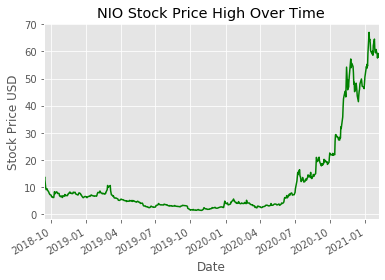

In [8]:
df['High'].plot(color = 'g')
plt.title('NIO Stock Price High Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price USD')

Text(0, 0.5, 'Stock Price USD')

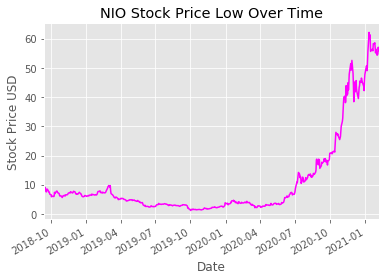

In [9]:
df['Low'].plot(color = 'magenta')

plt.title('NIO Stock Price Low Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price USD')

Text(0, 0.5, 'Stock Price USD')

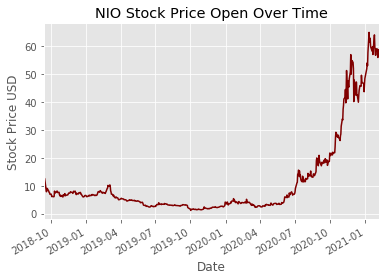

In [10]:
df['Open'].plot(color = 'maroon')

plt.title('NIO Stock Price Open Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price USD')

Text(0, 0.5, 'Stock Price USD')

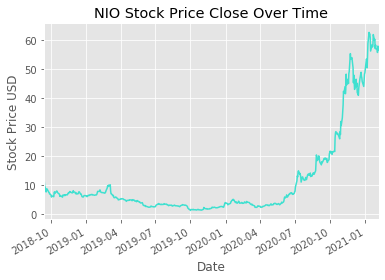

In [11]:
df['Close'].plot(color = 'turquoise')

plt.title('NIO Stock Price Close Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price USD')

Text(0, 0.5, 'Volume')

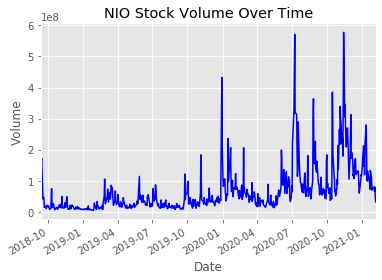

In [12]:
df['Volume'].plot(color = 'blue')

plt.title('NIO Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

In [13]:
#calculate the covariance between the high and volume
from numpy import cov
covariance = cov(df['High'], df['Volume'])
print(covariance)

[[2.32958749e+02 6.36922983e+08]
 [6.36922983e+08 5.99573694e+15]]


In [14]:
'''
Covariance by itself is not trivial to interpret, so let's make something
more accessible: Pearson's correlation coefficient

Pearson's Correlation Coefficient = Covariance(x,y)/[stdev(x) * stdev(y)]
For this metric to be incredibly insightful, the data samples should have a 
Gaussian(ish) distribution
'''
from scipy.stats import pearsonr

pcc = pearsonr(df['High'], df['Volume'])
print('Pearsons Correlation Coefficient: ', pcc[0])
print('Two-tailed p-value: ', pcc[1])

Pearsons Correlation Coefficient:  0.5389222605325156
Two-tailed p-value:  7.113382162882152e-47


In [15]:
'''
Now let's take a different approach and use Spearman's correlation coefficient.
Typically, Spearman's correlation coefficient is useful when we have a non-Gaussian
distribution.

Spearman's Correlation Coefficient = Covariance(rank(x),rank(y))/[stdev(rank(x))* stdev(rank(y)])
'''
from scipy.stats import spearmanr

scc = spearmanr(df['High'], df['Volume'])
print('Spearmans Correlation Coefficient: ', scc[0])
print('Two-tailed p-value: ', scc[1])

Spearmans Correlation Coefficient:  0.42730664430477566
Two-tailed p-value:  3.0074197648954826e-28


In [16]:
#we can also use df.corr() to generate a correlation matrix for all data
df.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.998548,0.999018,0.999128,0.538922,0.999128
Low,0.998548,1.000000,0.998804,0.998987,0.511009,0.998987
Open,0.999018,0.998804,1.000000,0.997702,0.521419,0.997702
Close,0.999128,0.998987,0.997702,1.000000,0.528446,1.000000
Volume,0.538922,0.511009,0.521419,0.528446,1.000000,0.528446
Adj Close,0.999128,0.998987,0.997702,1.000000,0.528446,1.000000


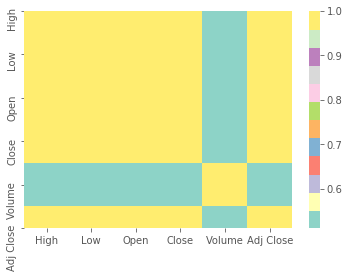

In [17]:
#Making a heat map of the correlation matrix
nioCorrs = df.corr()
mask = np.zeros_like(nioCorrs)
sns.heatmap(nioCorrs, cmap = 'Set3', mask=mask)

As we can see, a linear representation is NOT an effective way to represent the data


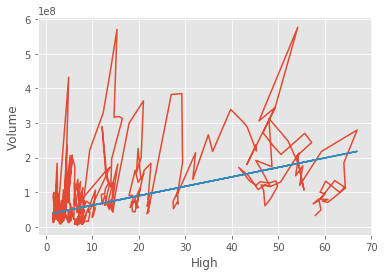

In [18]:
'''
Back to linear regression, let's visualize the linear relationship between
NIO High and Volume

'''


s, i, r, p, sd = scipy.stats.linregress(df['High'], df['Volume'])

fig, ax = plt.subplots()
ax.plot(df['High'], df['Volume'])
ax.plot(df['High'], i + (s*df['High']))

ax.set_xlabel('High')
ax.set_ylabel('Volume')

print('As we can see, a linear representation is NOT an effective way to represent the data')


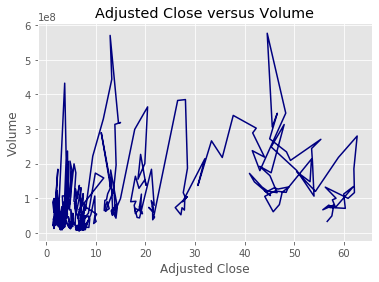

In [19]:
'''
Moving on, let's look at some different trends in NIO.
Adjusted Close versus Volume
'''
plt.plot(df['Adj Close'], df['Volume'], color = 'navy')
plt.xlabel('Adjusted Close')
plt.ylabel('Volume')
plt.title('Adjusted Close versus Volume')


plt.show()

In [20]:
#sigma function
def sigmoidFunction(x, beta1, beta2):
    y = 1/(1 + np.exp(-beta1 * (x-beta2)))
    return y

In [21]:
#experiment with arbitrary beta values
beta1 = 500
beta2 = 15

#logistic function
yHat = sigmoidFunction(df['Adj Close'], beta1, beta2)

Again, we get that this is not the best possible representation


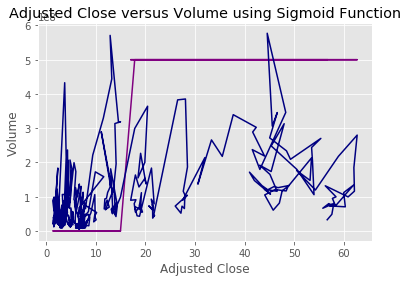

In [22]:
#plot out predictions against the actual
plt.plot(df['Adj Close'], yHat*499999000, color = 'purple')
plt.plot(df['Adj Close'], df['Volume'], color = 'navy')

plt.xlabel('Adjusted Close')
plt.ylabel('Volume')
plt.title('Adjusted Close versus Volume using Sigmoid Function')

print('Again, we get that this is not the best possible representation')

In [23]:
'''
Now, let's consider looking at the Moving Average
'''

#rolling mean
close = df['Adj Close']
mavg = close.rolling(window=100).mean()

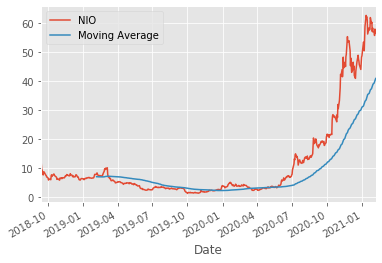

In [24]:
close.plot(label = 'NIO')
mavg.plot(label = 'Moving Average')
plt.legend()

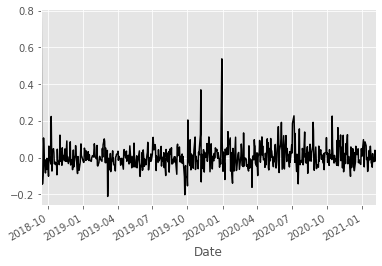

In [25]:
'''
Finding the return deviation
This is important for understanding the risk and return associated with NIO
'''

returnDeviation = close/close.shift(1)-1

returnDeviation.plot(color = 'black')

In [26]:
'''
Now that we have learned more about NIO, let's see how it compares to 
its competitors.

Toyota Motor (TM), General Motors(GM), Tesla (TSLA), and Ferrari(RACE)
'''

dfCompetition = web.DataReader(['NIO','TM', 'GM', 'TSLA','RACE'], 'yahoo', start, end)

In [27]:
#get just the Adjusted Close of the competition
dfCompetitionAdj = dfCompetition['Adj Close']

In [28]:
dfCompetition.head()

Attributes Adj Close                                                Close  \
Symbols          NIO          TM         GM       TSLA        RACE    NIO   
Date                                                                        
2018-09-12      6.60  119.910004  31.955553  58.108002  130.684799   6.60   
2018-09-13     11.60  121.959999  32.133812  57.891998  131.334335  11.60   
2018-09-14      9.90  122.279999  32.490337  59.040001  130.045105   9.90   
2018-09-17      8.50  122.480003  32.856239  58.967999  130.694656   8.50   
2018-09-18      7.68  125.029999  32.931293  56.992001  136.127151   7.68   

Attributes                                                ...   Open  \
Symbols             TM         GM       TSLA        RACE  ...    NIO   
Date                                                      ...          
2018-09-12  119.910004  34.060001  58.108002  132.789993  ...   6.00   
2018-09-13  121.959999  34.250000  57.891998  133.449997  ...   6.62   
2018-09-14  122.279999  34.630001  59.040001  132.139999  ...  12.66   
2018-09-17  122.480003  35.020000  58.967999  132.800003  ...   9.61   
2018-09-18  125.029999  35.099998  56.992001  138.320007  ...   8.73   

Attributes                                                     Volume  \
Symbols             TM         GM       TSLA        RACE          NIO   
Date                                                                    
2018-09-12  119.800003  33.700001  56.287998  131.240005   66849000.0   
2018-09-13  121.750000  34.259998  57.604000  133.729996  158346500.0   
2018-09-14  122.709999  34.470001  57.751999  133.100006  172473600.0   
2018-09-17  122.669998  34.500000  58.007999  133.279999   56323900.0   
2018-09-18  124.379997  35.169998  59.338001  133.110001   41827600.0   

Attributes                                               
Symbols           TM          GM        TSLA       RACE  
Date                                                     
2018-09-12  110500.0   9342300.0  50077000.0   711600.0  
2018-09-13  149900.0  14848700.0  31701500.0   592000.0  
2018-09-14  131400.0  13652800.0  33828000.0   672600.0  
2018-09-17  147300.0  10905300.0  34438000.0   740000.0  
2018-09-18  266900.0   8868100.0  82737500.0  1931700.0  

[5 rows x 30 columns]

In [29]:
#conducting correlation analysis
returnDeviationCompetition = dfCompetitionAdj.pct_change()
corr = returnDeviationCompetition.corr()

print(corr)

Symbols       NIO        TM        GM      TSLA      RACE
Symbols                                                  
NIO      1.000000  0.164717  0.198574  0.238796  0.181748
TM       0.164717  1.000000  0.540420  0.286879  0.553595
GM       0.198574  0.540420  1.000000  0.317750  0.503320
TSLA     0.238796  0.286879  0.317750  1.000000  0.371667
RACE     0.181748  0.553595  0.503320  0.371667  1.000000


Text(0, 0.5, 'TSLA Returns')

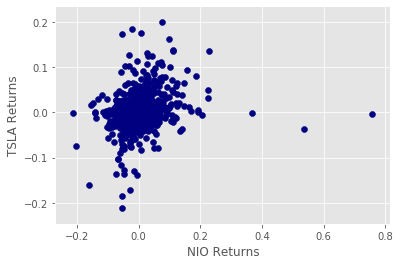

In [30]:
plt.scatter(returnDeviationCompetition.NIO, returnDeviationCompetition.TSLA, color = 'navy')
plt.xlabel('NIO Returns')
plt.ylabel('TSLA Returns')

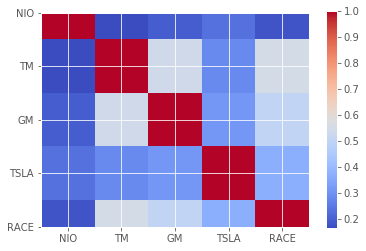

In [31]:
#heat map showing the different correlations with color
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

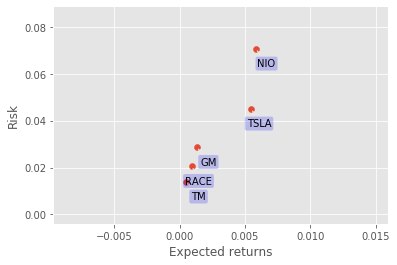

In [32]:
#going back to risk and returns
plt.scatter(returnDeviationCompetition.mean(), returnDeviationCompetition.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(returnDeviationCompetition.columns, returnDeviationCompetition.mean(), returnDeviationCompetition.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.2', fc = 'blue', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))